In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [417]:
total = pd.read_csv('master.csv')
HDIdata = pd.read_csv('HDI.csv')
HDIdata = HDIdata.melt('Country')
HDIdata.rename(columns = {'variable':'year', 'value':'HDI', ' gdp':'gdp'}, inplace=True)
HDIdata['year'] = HDIdata.year.astype(int)
HDIdata['Country'] = HDIdata['Country'].str[1:]
HDIdata.head()
total = total.rename(columns = {'suicides/100k pop':'suicide_rate'})
total = total.rename(columns = {'gdp_per_capita':'gdpc'})
total = total.rename(columns = {' gdp':'gdp'})
total = total.drop(columns='HDI')
total = pd.merge(total, HDIdata,  how='left', left_on=['country', 'year'], right_on = ['Country', 'year'])
total = total.drop(columns='Country')
total.rename(columns = {'HDI_y':'HDI'}, inplace=True)
total.head()


,country,year,sex,age,suicides_no,population,suicide_rate,country-year,gdp,gdpc,generation,HDI
0,Albania,1987.0,male,15-24 years,21,312900,6.71,Albania1987,2.156625e+09,796,Generation X,NaN
1,Albania,1987.0,male,35-54 years,16,308000,5.19,Albania1987,2.156625e+09,796,Silent,NaN
2,Albania,1987.0,female,15-24 years,14,289700,4.83,Albania1987,2.156625e+09,796,Generation X,NaN
3,Albania,1987.0,male,75+ years,1,21800,4.59,Albania1987,2.156625e+09,796,G.I. Generation,NaN
4,Albania,1987.0,male,25-34 years,9,274300,3.28,Albania1987,2.156625e+09,796,Boomers,NaN


In [418]:
middleeastcountry=['Cyprus','Israel','Bahrain','Oman','Qatar']
northeuropecountry=['Iceland', 'Finland','Denmark','Norway','Sweden']
middleeast=total[total.country.isin(middleeastcountry)]
northeurope=total[total.country.isin(northeuropecountry)]
northeurope = northeurope.dropna()
middleeast = middleeast.dropna()



Scatter plot for middle east

In [187]:
northeurope.to_csv("northeurope.csv", index=False)

In [419]:
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [315]:
middleeast['suicide_rate_mod'] = middleeast.suicide_rate.pow(1/5) 
middleeast.head()

,country,year,sex,age,suicides_no,population,suicide_rate,country-year,gdp,gdpc,generation,HDI,suicide_rate_mod
2672,Bahrain,1997.0,female,15-24 years,0,46573,0.0,Bahrain1997,6.349202e+09,11985,Generation X,0.779,0.0
2673,Bahrain,1997.0,female,25-34 years,0,50841,0.0,Bahrain1997,6.349202e+09,11985,Generation X,0.779,0.0
2674,Bahrain,1997.0,female,35-54 years,0,53562,0.0,Bahrain1997,6.349202e+09,11985,Boomers,0.779,0.0
2675,Bahrain,1997.0,female,5-14 years,0,55390,0.0,Bahrain1997,6.349202e+09,11985,Millenials,0.779,0.0
2676,Bahrain,1997.0,female,55-74 years,0,13826,0.0,Bahrain1997,6.349202e+09,11985,Silent,0.779,0.0


In [282]:
# middleeast OLS
model = smf.ols('suicide_rate_mod ~ country + year + sex + age + population + generation + gdpc + HDI + gdp', data = middleeast)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       suicide_rate_mod   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     88.49
Date:                Tue, 04 Jun 2019   Prob (F-statistic):          1.17e-178
Time:                        10:50:15   Log-Likelihood:                -514.91
No. Observations:                 920   AIC:                             1066.
Df Residuals:                     902   BIC:                             1153.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                       -28.6208     12.570     -2.277      0.023     -53.291      -3.950
country[T.Cyprus]                -0.1407      0.085     -1.651      0.099      -0.308       0.027
country[T.Israel]                 1.3493      0.145      9.337      0.000       1.066       1.633
country[T.Oman]                  -0.0251      0.086     -0.292      0.771      -0.194       0.144
country[T.Qatar]                 -0.3412      0.102     -3.345      0.001      -0.541      -0.141
sex[T.male]                       0.4286      0.029     14.995      0.000       0.373       0.485
age[T.25-34 years]                0.2432      0.048      5.096      0.000       0.150       0.337
age[T.35-54 years]                0.3629      0.051      7.050      0.000       0.262       0.464
age[T.5-14 years]                -0.7101      0.048    -14.910      0.000      -0.804      -0.617
age[T.75+ years]                 -0.3931      0.054     -7.293      0.000      -0.499      -0.287
generation[T.G.I. Generation]     0.4152      0.085      4.873      0.000       0.248       0.582
generation[T.Millenials]          0.1223      0.046      2.646      0.008       0.032       0.213
generation[T.Z&X]                 0.0759      0.046      1.663      0.097      -0.014       0.165
year                              0.0127      0.007      1.863      0.063      -0.001       0.026
population                    -8.537e-07   1.49e-07     -5.747      0.000   -1.15e-06   -5.62e-07
gdpc                           1.093e-05   1.99e-06      5.500      0.000    7.03e-06    1.48e-05
HDI                               4.4332      1.753      2.529      0.012       0.993       7.873
gdp                           -3.653e-12   5.79e-13     -6.305      0.000   -4.79e-12   -2.52e-12
==============================================================================
Omnibus:                        1.838   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.399   Jarque-Bera (JB):                1.702
Skew:                          -0.096   Prob(JB):                        0.427
Kurtosis:                       3.085   Cond. No.                     1.06e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [281]:
middleeast.loc[middleeast.generation == "Generation Z", 'generation'] = 'Z&X'
middleeast.loc[middleeast.generation == "Generation X", 'generation'] = 'Z&X'
middleeast['suicide_rate'].groupby(middleeast['generation']).describe()

middleeast.loc[middleeast.generation == "Silent", 'generation'] = 'B&S'
middleeast.loc[middleeast.generation == "Boomers", 'generation'] = 'B&S'
middleeast['suicide_rate'].groupby(middleeast['generation']).describe()

middleeast.loc[middleeast.age == "55-74 years", 'age'] = '15&74'
middleeast.loc[middleeast.age == "15-24 years", 'age'] = '15&74'
middleeast['suicide_rate'].groupby(middleeast['age']).describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
15&74,308.0,4.177468,5.030941,0.0,0.0000,2.550,5.5350,26.69
25-34 years,154.0,4.689221,4.335073,0.0,1.6100,3.000,7.8375,18.55
35-54 years,154.0,4.817987,4.615473,0.0,1.5675,3.195,7.6600,16.90
5-14 years,150.0,0.142533,0.342002,0.0,0.0000,0.000,0.1575,2.53
75+ years,154.0,7.889416,12.729837,0.0,0.0000,0.000,12.2000,66.18


In [283]:
# middleeast
from sklearn.model_selection import train_test_split
X_middleeast = middleeast[['country','year' ,'sex' , 'age' , 'population' , 'generation' , 'HDI' , 'gdpc' , 'gdp']]
X_middleeast.dropna()
X_train, X_test, y_train, y_test = train_test_split(X_middleeast, middleeast.suicide_rate_mod, test_size=0.3, random_state=0)


X_train['suicide_rate'] = y_train
X_train.head()

cvmodel = smf.ols('suicide_rate ~ country  + sex + year + age + population + generation + HDI + gdpc + gdp', data = X_train)
resultsCV = cvmodel.fit()
cvPredictionLM = resultsCV.predict(X_test)
#MS
sum((cvPredictionLM - y_test)**2)




/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


58.85051206182397

In [378]:
northeurope['suicide_rate_mod'] = northeurope.suicide_rate.pow(1/5)
northeurope.head()

,country,year,sex,age,suicides_no,population,suicide_rate,country-year,gdp,gdpc,generation,HDI,population_mod,suicide_rate_mod
7418,Denmark,1994.0,male,15&75,89,131700,67.58,Denmark1994,1.561623e+11,32034,G.I. Generation,0.824,50.877831,2.322542
7419,Denmark,1994.0,male,55-74 years,189,448200,42.17,Denmark1994,1.561623e+11,32034,Silent,0.824,76.528632,2.113493
7420,Denmark,1994.0,male,35-54 years,279,755600,36.92,Denmark1994,1.561623e+11,32034,Boomers,0.824,91.081600,2.058033
7421,Denmark,1994.0,female,15&75,70,230600,30.36,Denmark1994,1.561623e+11,32034,G.I. Generation,0.824,61.322488,1.979066
7422,Denmark,1994.0,male,25-34 years,85,414100,20.53,Denmark1994,1.561623e+11,32034,Boomers,0.824,74.536399,1.830113


In [379]:
northeurope.loc[northeurope.age == "75+ years", 'age'] = '15&75'
northeurope.loc[northeurope.age == "15-24 years", 'age'] = '15&75'

northeurope['suicide_rate'].groupby(northeurope['age']).describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
15&75,512.0,17.248594,16.087772,0.0,5.9275,11.010,26.2750,90.06
25-34 years,256.0,16.190117,12.884303,0.0,7.0475,12.480,21.3750,66.32
35-54 years,256.0,19.320430,12.624866,0.0,10.0050,18.005,24.0875,68.56
5-14 years,252.0,0.462738,0.706045,0.0,0.0000,0.320,0.6300,4.85
55-74 years,256.0,19.499844,11.191296,0.0,10.2275,17.430,25.9575,59.25


In [380]:
#northeurope OLS
model = smf.ols('suicide_rate_mod ~ country + year + sex + age + population + HDI + gdp', data = northeurope)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       suicide_rate_mod   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     289.4
Date:                Tue, 04 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:24:28   Log-Likelihood:                -414.18
No. Observations:                1532   AIC:                             856.4
Df Residuals:                    1518   BIC:                             931.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -20.1844      9.023     -2.237      0.025     -37.884      -2.485
country[T.Finland]     0.1160      0.032      3.621      0.000       0.053       0.179
country[T.Iceland]    -0.6874      0.056    -12.329      0.000      -0.797      -0.578
country[T.Norway]      0.0879      0.043      2.056      0.040       0.004       0.172
country[T.Sweden]      0.3533      0.041      8.532      0.000       0.272       0.434
sex[T.male]            0.4018      0.016     24.655      0.000       0.370       0.434
age[T.25-34 years]     0.1427      0.025      5.663      0.000       0.093       0.192
age[T.35-54 years]     0.5108      0.041     12.460      0.000       0.430       0.591
age[T.5-14 years]     -0.9775      0.025    -39.423      0.000      -1.026      -0.929
age[T.55-74 years]     0.3852      0.031     12.408      0.000       0.324       0.446
year                   0.0119      0.005      2.460      0.014       0.002       0.021
population         -7.579e-07   7.62e-08     -9.948      0.000   -9.07e-07   -6.08e-07
HDI                   -2.3553      0.821     -2.869      0.004      -3.965      -0.745
gdp                -3.017e-13   1.56e-13     -1.936      0.053   -6.07e-13    4.04e-15
==============================================================================
Omnibus:                      429.048   Durbin-Watson:                   1.764
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2104.114
Skew:                          -1.232   Prob(JB):                         0.00
Kurtosis:                       8.186   Cond. No.                     2.98e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+14. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [381]:
#northeurope
from sklearn.model_selection import train_test_split
X_northeurope = northeurope[['country', 'sex' , 'age' , 'population' , 'generation' , 'HDI' , 'gdp']]
X_northeurope.dropna()
X_train, X_test, y_train, y_test = train_test_split(X_northeurope, northeurope.suicide_rate_mod, test_size=0.3, random_state=0)


X_train['suicide_rate'] = y_train
X_train.head()

cvmodel = smf.ols('suicide_rate ~ country  + sex + age + population + HDI + gdp', data = X_train)
resultsCV = cvmodel.fit()
cvPredictionLM = resultsCV.predict(X_test)
#MSE
sum((cvPredictionLM - y_test)**2)



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


43.99485316875647

Text(0.5, 1.0, 'northeurope')

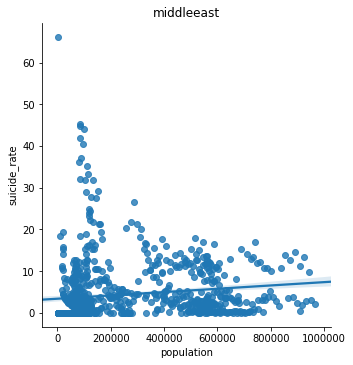

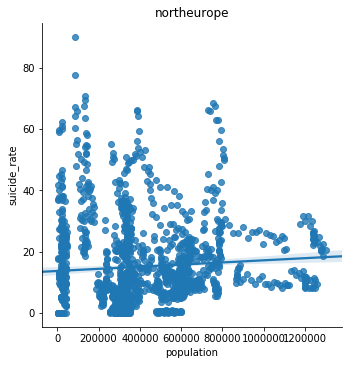

In [382]:
sns.lmplot(x="population", y="suicide_rate", data=middleeast)
plt.title('middleeast')
sns.lmplot(x="population", y="suicide_rate", data=northeurope)
plt.title('northeurope')


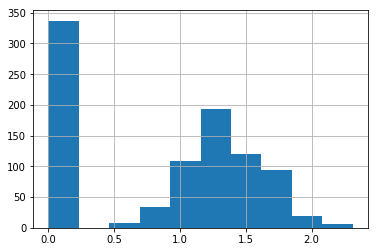

In [420]:
middleeast.suicide_rate.pow(1/5).hist()
middleeast['suicide_rate_mod'] = middleeast.suicide_rate.pow(1/5)

In [421]:
middleeast.loc[middleeast.age == "55-74 years", 'age'] = '15-55-75+'
middleeast.loc[middleeast.age == "75+ years", 'age'] = '15-55-75+'
middleeast.loc[middleeast.age == "15-24 years", 'age'] = '15-55-75+'
middleeast['suicide_rate'].groupby(middleeast['age']).describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
15-55-75+,462.0,5.414784,8.585204,0.0,0.0000,2.090,7.5150,66.18
25-34 years,154.0,4.689221,4.335073,0.0,1.6100,3.000,7.8375,18.55
35-54 years,154.0,4.817987,4.615473,0.0,1.5675,3.195,7.6600,16.90
5-14 years,150.0,0.142533,0.342002,0.0,0.0000,0.000,0.1575,2.53


In [423]:
#middleeast GLM
glmmodel = smf.glm('suicide_rate_mod ~ country + sex + age + population + generation + gdpc + HDI + gdp', data = middleeast, family=sm.families.Gaussian())
glmresults = glmmodel.fit()
glmresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       suicide_rate_mod   No. Observations:                  920
Model:                            GLM   Df Residuals:                      903
Model Family:                Gaussian   Df Model:                           16
Link Function:               identity   Scale:                         0.19136
Method:                          IRLS   Log-Likelihood:                -536.19
Date:                Tue, 04 Jun 2019   Deviance:                       172.80
Time:                        16:39:34   Pearson chi2:                     173.
No. Iterations:                     3   Covariance Type:             nonrobust
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -4.3872      0.911     -4.818      0.000      -6.172      -2.603
country[T.Cyprus]                -0.1859      0.072     -2.600      0.009      -0.326      -0.046
country[T.Israel]                 1.1308      0.083     13.544      0.000       0.967       1.294
country[T.Oman]                  -0.0232      0.084     -0.276      0.782      -0.188       0.142
country[T.Qatar]                 -0.4145      0.084     -4.948      0.000      -0.579      -0.250
sex[T.male]                       0.4203      0.029     14.391      0.000       0.363       0.478
age[T.25-34 years]                0.2316      0.051      4.501      0.000       0.131       0.332
age[T.35-54 years]                0.3242      0.061      5.289      0.000       0.204       0.444
age[T.5-14 years]                -0.7670      0.067    -11.504      0.000      -0.898      -0.636
generation[T.G.I. Generation]     0.0400      0.094      0.427      0.669      -0.143       0.223
generation[T.Generation X]        0.0629      0.054      1.173      0.241      -0.042       0.168
generation[T.Generation Z]        0.1467      0.101      1.451      0.147      -0.051       0.345
generation[T.Millenials]          0.1302      0.062      2.095      0.036       0.008       0.252
generation[T.Silent]             -0.1868      0.060     -3.120      0.002      -0.304      -0.069
population                    -5.902e-07   1.46e-07     -4.037      0.000   -8.77e-07   -3.04e-07
gdpc                           1.165e-05      2e-06      5.837      0.000    7.74e-06    1.56e-05
HDI                               5.8425      1.158      5.044      0.000       3.572       8.113
gdp                           -3.738e-12   5.86e-13     -6.378      0.000   -4.89e-12   -2.59e-12
=================================================================================================
"""

In [422]:
# middleeast
from sklearn.model_selection import train_test_split
X_middleeast = middleeast[['country' ,'sex' , 'age' ,'population' , 'generation' , 'HDI' , 'gdpc' , 'gdp']]
X_middleeast.dropna()
X_train, X_test, y_train, y_test = train_test_split(X_middleeast, middleeast.suicide_rate_mod, test_size=0.3, random_state=0)


X_train['suicide_rate'] = y_train
X_train.head()

cvmodel = smf.glm('suicide_rate ~ country  + sex + age + population + generation + HDI + gdpc + gdp', data = X_train)
resultsCV = cvmodel.fit()
cvPredictionLM = resultsCV.predict(X_test)
#MS
sum((cvPredictionLM - y_test)**2)



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


62.33934707115143

In [395]:
59.360304747470316

59.90628126743908

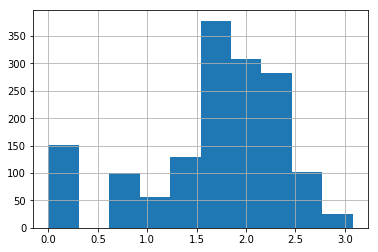

In [363]:
northeurope.suicide_rate.pow(1/5).hist()
northeurope['suicide_rate_mod'] = northeurope.suicide_rate.pow(1/5)


In [383]:
#northeurope GLM
glmmodel = smf.glm('suicide_rate_mod ~ country + year + sex + age + population + HDI + gdp', data = northeurope, family=sm.families.Gaussian())
glmresults = glmmodel.fit()
glmresults.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       suicide_rate_mod   No. Observations:                 1532
Model:                            GLM   Df Residuals:                     1520
Model Family:                Gaussian   Df Model:                           11
Link Function:               identity   Scale:                         0.10134
Method:                          IRLS   Log-Likelihood:                -414.18
Date:                Tue, 04 Jun 2019   Deviance:                       154.03
Time:                        16:24:44   Pearson chi2:                     154.
No. Iterations:                     3   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -20.1844      9.017     -2.238      0.025     -37.858      -2.511
country[T.Finland]     0.1160      0.032      3.623      0.000       0.053       0.179
country[T.Iceland]    -0.6874      0.056    -12.337      0.000      -0.797      -0.578
country[T.Norway]      0.0879      0.043      2.058      0.040       0.004       0.172
country[T.Sweden]      0.3533      0.041      8.537      0.000       0.272       0.434
sex[T.male]            0.4018      0.016     24.671      0.000       0.370       0.434
age[T.25-34 years]     0.1427      0.025      5.667      0.000       0.093       0.192
age[T.35-54 years]     0.5108      0.041     12.468      0.000       0.430       0.591
age[T.5-14 years]     -0.9775      0.025    -39.449      0.000      -1.026      -0.929
age[T.55-74 years]     0.3852      0.031     12.416      0.000       0.324       0.446
year                   0.0119      0.005      2.462      0.014       0.002       0.021
population         -7.579e-07   7.61e-08     -9.954      0.000   -9.07e-07   -6.09e-07
HDI                   -2.3553      0.820     -2.871      0.004      -3.963      -0.748
gdp                -3.017e-13   1.56e-13     -1.937      0.053   -6.07e-13     3.6e-15
======================================================================================
"""

In [384]:
from sklearn.model_selection import train_test_split
X_northeurope = northeurope[['country' , 'sex' , 'year' , 'age' , 'population' , 'HDI' , 'gdp' ,'gdpc']]
X_northeurope.dropna()
X_train, X_test, y_train, y_test = train_test_split(X_northeurope, northeurope.suicide_rate_mod, test_size=0.3, random_state=0)


X_train['suicide_rate'] = y_train
X_train.head()

cvmodel = smf.glm('suicide_rate ~ country  + year + sex + age + population + HDI + gdp', data = X_train)
resultsCV = cvmodel.fit()
cvPredictionLM = resultsCV.predict(X_test)
#MSE
sum((cvPredictionLM - y_test)**2)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


43.67205071701613